# Introduction

We are creating a model that can help a real estate company predict at what price they should sell a listing for!

In the first half of this notebook is a quick exploration of the dataframe we have found on the sales of Kind County Houses.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  int64  
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

It seems that there are 3 columns that have incomplete values, those being waterfront, view and yr_renovated.

# Addressing the Nan Values in 'Waterfront'

We would like to be able to include the information in the waterfront feature but need to address the 2000+ Nan entries which will be difficult because finding that information with just a dataframe isn't a walk in the park.

In [6]:
df.waterfront.value_counts()

NO     29636
YES      519
Name: waterfront, dtype: int64

In [7]:
nanwater = df.loc[df['waterfront'].isnull()]

In [8]:
nanwater.to_csv('nanwater.csv')

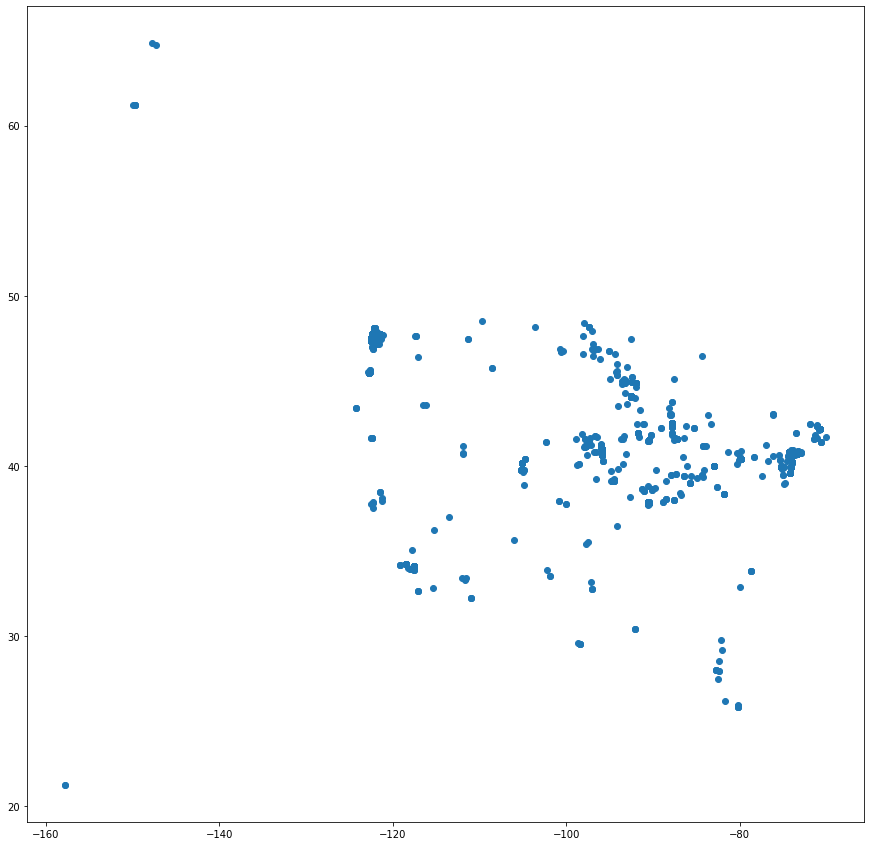

In [9]:
fig = plt.subplots(figsize = (15,15))
plt.scatter(df['long'], df['lat']);

After vizualizing this data in Tabelau I was able to come to the conclusion that the Nan values in waterfront were not set as Nan values because they were not waterfront as previously thought. The addresses listed are a mixture of waterfront and non-waterfront which leads me to wanting to remove the rows with Nan values. With a little bit of Tableau magic I was able to locate the 79 entries of homes that were waterfront but marked as NAN.

# Corrolation Heatmap

Im going to take a quick aside before addressing the NaN values in waterfront to look at a corrolation heatmap in hopes of getting a better understanding of what relations these columns have with eachother.

In [10]:
clean_df = df.copy(deep=True)

In [11]:
clean_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [12]:
clean_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


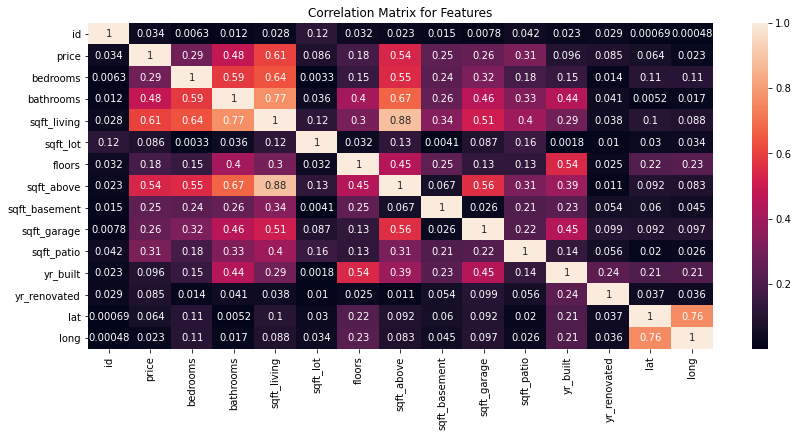

In [13]:
plt.figure(figsize=(14, 6))
sns.heatmap(clean_df.corr().abs(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig('./vis/' + 'corrmat', bbox_inches='tight');
plt.show()

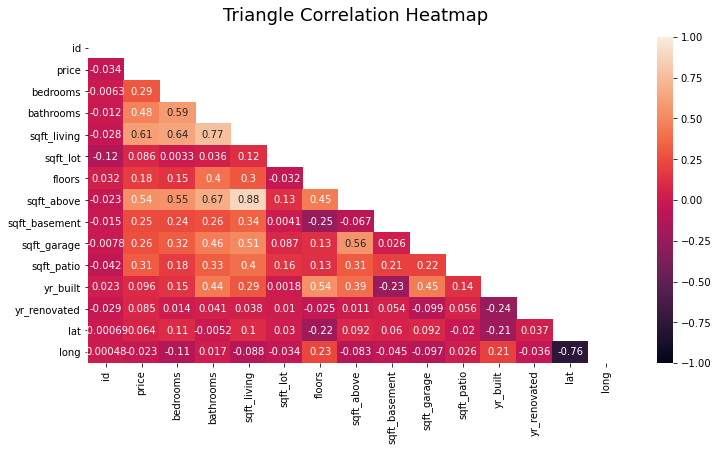

In [14]:
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(clean_df.corr(), dtype=bool))
heatmap = sns.heatmap(clean_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.savefig('./vis/' + 'corrmat2', bbox_inches='tight');

# Columns that I nominate we drop! Are: sqft_lot15, long, lat, yr built, sqft_lot. 

# We shall now resume the Saga of waterfront Nan.

Through Tableau I exported the DF of the 79 entries that needed to be changed from NAN to YES. All other frames of NAN will be changed to NO. Below I am importing the CSV that has the IDs of all the entries to be changed to YES.

In [15]:
waterfront_id = pd.read_csv('./data/waterfront - Sheet1.csv')

In [16]:
waterfront_id

,Id,Lat,Long
0,46100204,47.5673,-122.210
1,46100504,47.5648,-122.210
2,121039042,47.3351,-122.362
3,148000705,47.5732,-122.411
4,518500610,47.5299,-122.203
...,...,...,...
74,8550001515,47.3551,-122.475
75,8888000055,47.4781,-122.490
76,9201300020,47.5789,-122.076
77,9273200145,47.5909,-122.384


In [17]:
waterfront_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      79 non-null     int64  
 1   Lat     79 non-null     float64
 2   Long    79 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.0 KB


In [18]:
waterfront_id['Id']

0       46100204
1       46100504
2      121039042
3      148000705
4      518500610
         ...    
74    8550001515
75    8888000055
76    9201300020
77    9273200145
78    9829200325
Name: Id, Length: 79, dtype: int64

To accomplish my goal of having every waterfront house labeled as such I will create a master list of all the IDs that need a YES value. To do this I first needed to create list of unique values for Ids in waterfront dataframe. remember that this is the dataframe of all the waterfront properties that used to be listed as NAN.

In [19]:
water_ids = waterfront_id['Id'].unique()

Create list of the unique values for Ids from the original dataframe.

In [20]:
og_water = df[df['waterfront'] == 'YES']

In [21]:
og_water_ids = og_water['id'].unique()

These are my two np.arrays that will be combined together as lists to create a master list which I called final because I was lostss in the sauce and couldnt come up with descriptive names.

In [22]:
og_water_ids

array([7849200460, 7937600340, 2085200775, 3342103985, 7327700100,
       7327700090, 4045500060,  239000136, 6151800280,  726059171,
       4016800015,  895000035, 2817210010, 8731960240,  222029022,
       1459500060,  724069123,  537000320, 3122039039,  121039083,
       3524049137, 5559200055,  625059040, 1722039039, 4045000065,
       1981200150, 1924059087,  824059240, 1364300330, 1364300325,
       6795100420,  921049244,  284000095, 6151800340, 3793600100,
       2623039032, 4013200075, 2923039243, 7129302735, 7702600810,
       2223059061, 2224079090, 2322069066, 8096000155, 4046710190,
        323079078, 3980300165, 1422039001, 2624089072, 2423029055,
       8106100110, 4045000055, 2623039042, 9413400100, 6064600100,
       3343302600, 5494400140, 7937600535, 6072800125, 3761100196,
       3343302500, 7293700005,  203100235, 1823069030, 3534900325,
       3422049073, 4047200130, 3423069020, 1364300036, 1724069035,
       2524049153, 2923500230,  824069060, 2223059069, 2623029

In [23]:
water_ids

array([  46100204,   46100504,  121039042,  148000705,  518500610,
        521049227,  573000685,  587550280,  623039026,  824059265,
        825059178,  868001790,  913000340, 1454600256, 1524039043,
       1568100920, 1724069060, 1814800060, 1822039138, 1825069031,
       1959701890, 1962200435, 1964700054, 2025049111, 2025049114,
       2025069025, 2344300180, 2525049263, 2560805440, 2579500110,
       2581300055, 2607801120, 2726049034, 2818600060, 2929600035,
       3222049159, 3342100569, 3342700371, 3577000116, 3616600003,
       3629160060, 3760500280, 3760500516, 3761700053, 3896100130,
       4058200040, 4154303215, 4218400100, 4385700660, 4385700735,
       4441300170, 5067400032, 5215200010, 5249803645, 5451300105,
       5486800070, 5700003630, 6102400166, 6117500320, 6117501015,
       6329000050, 6371000026, 6372000280, 6398000191, 7129303070,
       7203600040, 7203600560, 7430500301, 7524950710, 7632400400,
       7768800290, 7772800020, 7781600100, 8106100085, 8550001

convert both np.array to lists and combione them together so that we can search them in the whatever function. "whatever" is actually the name of the function because.. well.. I was lost in the sauce and thats just the name that I had in the moment..

In [24]:
og_water_list = og_water_ids.tolist()

In [25]:
water_list = water_ids.tolist()

In [26]:
final = water_list + og_water_list

In [27]:
def whatever(row):
    if row['id'] in final:
        return "YES"
    else:
        return "NO"
df['waterfront'] = df.apply(whatever, axis = 1)

In [28]:
df['waterfront'].value_counts()

NO     29626
YES      529
Name: waterfront, dtype: int64

# No more Nans in my waterfront column!

In [29]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


# What are other dirty things that we can clean??

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  int64  
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

We can see here that there are still a few Null values in 'view' and in 'yr_renovated'. It will also be important to change date, view, waterfront, view, condition, and grade to numerical values to better serve our regresions.

# Lets take a look at cleaning view!

In [31]:
df['view'].isna().sum()

0

In [32]:
df[df["view"].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long


In [33]:
df['view'].value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

It seems like we have a few options here, one would be to drop the rows, which personally I dont have a problem with seeing as how we will most likely still have a strong model afterwards. We could also replace with the mean seeing as how adding a few more values in there probably wouldnt mess up a single variate regression but I think it might start having consiquences in a multi but.. i dont know.. It was also stated in the project description that deleting the view column wasnt a bad idea?

In [34]:
drop_view_df = df.copy(deep=True)

In [35]:
drop_view_df = drop_view_df.dropna(subset=['view'])

In [36]:
drop_view_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [37]:
drop_view_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  int64  
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

Well, 21,500 aint all that bad.. I think we can still make a good model with that many values!

# What about yr_renovated?

In [38]:
drop_view_df.yr_renovated.value_counts()

0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1942        1
1972        1
1951        1
1930        1
Name: yr_renovated, Length: 83, dtype: int64

In [39]:
drop_view_df['yr_renovated'].isna().sum()

0

What I'm gather from this is that 17,000 have never been renovated!? and tbh, a renovation in 1950, does that even count as a renovation??? like, what is the cut off for a renovation? doesn't renovation imply that its kind of new feeling?? I think it would probably be fine to call all of these NaNs a 0. But 4000 is kind of a lot of data to be throwing around. But like where else would you put it? Imma just change them to 0 because there is a 20/21 chance they were gonna end up there anyways.

In [40]:
drop_view_df['yr_renovated']=drop_view_df['yr_renovated'].fillna(0)

In [41]:
drop_view_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  int64  
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

Now we have no more Null values! We just need to change our non-numericals to num form.

# Converting to number form!

What columns were we talking about again?? date, waterfront, view, condition, and grade. Date will probably be the easiest to deal with.

# Convert Date from object to datetime.

In [42]:
drop_view_df['date']= pd.to_datetime(drop_view_df['date'])

In [43]:
drop_view_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  int64         
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

# Convert Waterfront from Y/N to 1 and 0

In [44]:
numerical_value_clean = drop_view_df.copy(deep=True)

In [45]:
numerical_value_clean.waterfront = numerical_value_clean.waterfront.map({'YES': 1, 'NO': 0})

In [46]:
numerical_value_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,2022-05-24,675000,4,1.0,1180,7140,1.0,0,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,2021-12-13,920000,5,2.5,2770,6703,1.0,0,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,2021-09-29,311000,6,2.0,2880,6156,1.0,0,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,2021-12-14,775000,3,3.0,2160,1400,2.0,0,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,2021-08-24,592500,2,2.0,1120,758,2.0,0,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Well that one wasn't so bad! Now I think we just have the more complex ones to do! I just need to verify that we actually need all of those columns!

In [47]:
numerical_value_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  int64         
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  int64         
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

im noticing that sqft_basement is an object which i dont like

# Whats up with sqft_basement?

In [48]:
numerical_value_clean.sqft_basement.value_counts()

0       15471
1010      257
1100      224
1060      219
1200      192
        ...  
3350        1
1079        1
3110        1
2870        1
3590        1
Name: sqft_basement, Length: 459, dtype: int64

Why does it have ? in there? what will I do with that?? Imma pull a Praveen and just delete em.

In [49]:
numerical_value_clean = numerical_value_clean[numerical_value_clean.sqft_basement != '?']

In [50]:
numerical_value_clean.sqft_basement.value_counts()

0       15471
1010      257
1100      224
1060      219
1200      192
        ...  
3350        1
1079        1
3110        1
2870        1
3590        1
Name: sqft_basement, Length: 459, dtype: int64

In [51]:
numerical_value_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  int64         
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  int64         
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [52]:
almost_done_cleaning = numerical_value_clean.copy(deep=True)

In [53]:
almost_done_cleaning['sqft_basement'] = pd.to_numeric(almost_done_cleaning['sqft_basement'])

In [54]:
almost_done_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  int64         
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  int64         
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

# How many different values are in view, condition, and grade?

In [55]:
almost_done_cleaning.view.value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [56]:
almost_done_cleaning.grade.value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [57]:
almost_done_cleaning.condition.value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

# Simple Linear Regression Regress

While my group gets back to me on while of these things they would like to focus on, Im gonna do a simple linear regression.

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [59]:
X = almost_done_cleaning[['sqft_living']]
y = almost_done_cleaning['price']

model = sm.OLS(endog = y, exog = sm.add_constant(X))
results = model.fit()
results

In [60]:
simple_model_sumamry = results.summary()
simple_model_sumamry

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:01   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well it seems like for a starting point that price and sqft_living seem to explain 50% the variance. lets see if we cant get that number a little higher? But is it important to see if all the graphs are a normal distribution?

# Before we go into multivariate lets look at all the distributions of our columns!

In [61]:
almost_done_cleaning.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

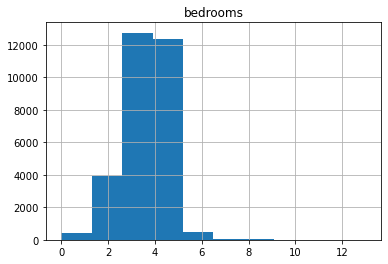

In [62]:
almost_done_cleaning.hist(column='bedrooms');

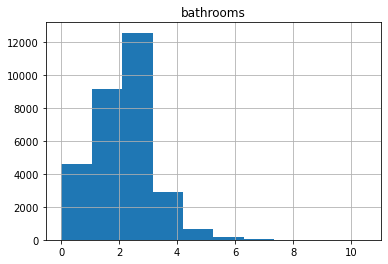

In [63]:
almost_done_cleaning.hist(column='bathrooms');

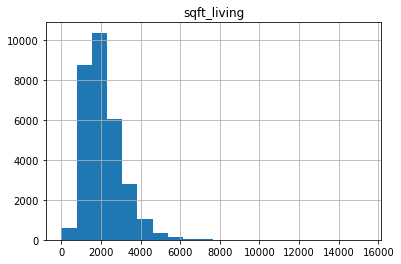

In [64]:
almost_done_cleaning.hist(column='sqft_living', bins = 20);

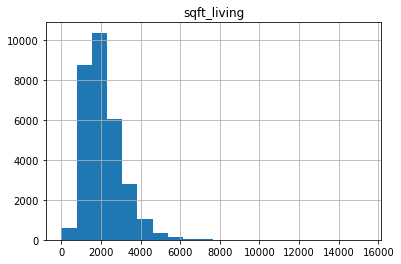

In [65]:
almost_done_cleaning.hist(column='sqft_living', bins = 20);

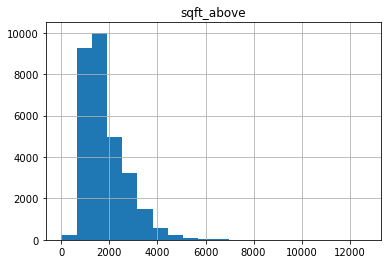

In [66]:
almost_done_cleaning.hist(column='sqft_above', bins = 20);

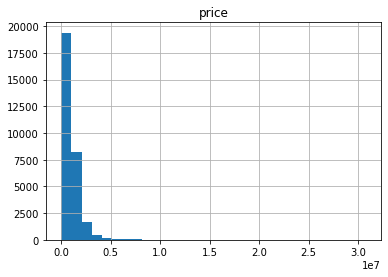

In [67]:
almost_done_cleaning.hist(column='price', bins = 30);

# Applying logs to see if we can get nromal distros from some of these things

In [68]:
almost_done_cleaning['logged_price'] = np.log(almost_done_cleaning['price']) 

In [69]:
almost_done_cleaning.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,logged_price
0,7399300360,2022-05-24,675000,4,1.0,1180,7140,1.0,0,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,13.422468
1,8910500230,2021-12-13,920000,5,2.5,2770,6703,1.0,0,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,13.732129
2,1180000275,2021-09-29,311000,6,2.0,2880,6156,1.0,0,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,12.647548
3,1604601802,2021-12-14,775000,3,3.0,2160,1400,2.0,0,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,13.560618
4,8562780790,2021-08-24,592500,2,2.0,1120,758,2.0,0,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,13.292106


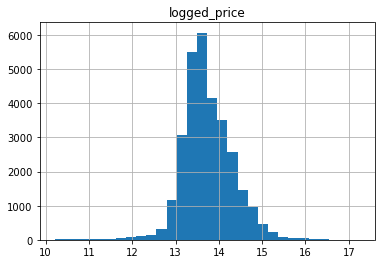

In [70]:
almost_done_cleaning.hist(column='logged_price', bins = 30);

In [71]:
almost_done_cleaning['logged_sqft_living'] = np.log(almost_done_cleaning['sqft_living']) 

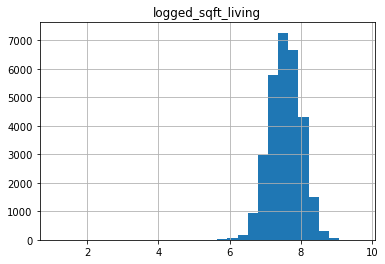

In [72]:
almost_done_cleaning.hist(column='logged_sqft_living', bins = 30);

In [73]:
X_logged_sqft_living = almost_done_cleaning[['logged_sqft_living']]
y_logged_price = almost_done_cleaning['logged_price']

model_logged_price = sm.OLS(endog = y_logged_price, exog = sm.add_constant(X_logged_sqft_living))
results_logged_price = model_logged_price.fit()
results_logged_price

In [74]:
price_logged_summary = results_logged_price.summary()
price_logged_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                 1.612e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:03   Log-Likelihood:                -20055.
No. Observations:               30155   AIC:                         4.011e+04
Df Residuals:                   30153   BIC:                         4.013e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.8799      0.046    170.559      0.000       7.789       7.970
logged_sqft_living     0.7746      0.006    126.947      0.000       0.763       0.787
==============================================================================
Omnibus:                     4837.276   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49853.301
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       9.233   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Maybe we need to normalize them first? I seem to remember this as a step..?

In [75]:
from sklearn import preprocessing

well charlie seems to think that isnt the case! he is saying that you only have to apply the log to the target feature so maybe I will try that!

In [76]:
X = almost_done_cleaning[['sqft_living']]
y_logged_price = almost_done_cleaning['logged_price']

charlie_model_logged_price = sm.OLS(endog = y_logged_price, exog = sm.add_constant(X)).fit()
charlie_model_logged_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.898e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:03   Log-Likelihood:                -19148.
No. Observations:               30155   AIC:                         3.830e+04
Df Residuals:                   30153   BIC:                         3.832e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9491      0.006   2062.042      0.000      12.937      12.961
sqft_living     0.0004    2.7e-06    137.785      0.000       0.000       0.000
==============================================================================
Omnibus:                     5903.116   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49981.952
Skew:                          -0.706   Prob(JB):                         0.00
Kurtosis:                       9.147   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hmm well it did seem to bring it back up but it didnt do as well as the original non-logged price so idk.. going to have to ask about that for sure.

# Hmm.. maybe I have messed something up.. lets try again following hte directions and not from memory and maybe that will help.

In [77]:
X = almost_done_cleaning['sqft_living']
y = almost_done_cleaning['price']

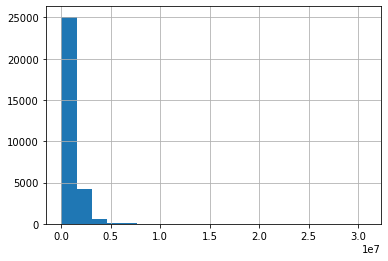

In [78]:
y.hist(bins = 20);

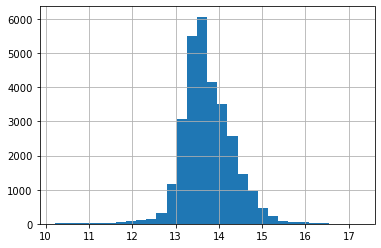

In [79]:
y_scld = np.log(y)
y_scld.hist(bins = 30);

In [80]:
y_scld

0        13.422468
1        13.732129
2        12.647548
3        13.560618
4        13.292106
           ...    
30150    14.256986
30151    14.087825
30152    13.592367
30153    13.560618
30154    13.122363
Name: price, Length: 30155, dtype: float64

In [81]:
almost_done_cleaning['logged_price']

0        13.422468
1        13.732129
2        12.647548
3        13.560618
4        13.292106
           ...    
30150    14.256986
30151    14.087825
30152    13.592367
30153    13.560618
30154    13.122363
Name: logged_price, Length: 30155, dtype: float64

hmmm okay, it looks the same so far..

In [82]:
model_price_sqft_living = sm.OLS(y_scld, X).fit()
model_price_sqft_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                          1.623e+05
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:25:04   Log-Likelihood:                         -93871.
No. Observations:               30155   AIC:                                  1.877e+05
Df Residuals:                   30154   BIC:                                  1.878e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.0054   1.35e-05    402.886      0.000       0.005       0.005
==============================================================================
Omnibus:                    11302.224   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80173.067
Skew:                          -1.631   Prob(JB):                         0.00
Kurtosis:                      10.292   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

hmmmm... well thats a pretty good improvement?! I wonder what I have done wrong in imputting my values?

In [83]:
X = almost_done_cleaning[['sqft_living']]
y_logged_price = almost_done_cleaning['logged_price']

charlie_model_logged_price = sm.OLS(endog = y_logged_price, exog = X).fit()
charlie_model_logged_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           logged_price   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                          1.623e+05
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:25:04   Log-Likelihood:                         -93871.
No. Observations:               30155   AIC:                                  1.877e+05
Df Residuals:                   30154   BIC:                                  1.878e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.0054   1.35e-05    402.886      0.000       0.005       0.005
==============================================================================
Omnibus:                    11302.224   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80173.067
Skew:                          -1.631   Prob(JB):                         0.00
Kurtosis:                      10.292   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AHHHHH WELL IT SEEMS THAT THE ADDITION OF THE CONSTANT IS WHAT WAS DIFFERENT BETWEEN THE TWO! But after a long converstation with Praveen it seems that Gregs notebook that does not add the constant is actually a mistake and you should add the constant! Another thing to note is that we will be using the sqrt of price to normalize NOT the log because itgives us a better r^2.

In [84]:
almost_done_cleaning.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'logged_price',
       'logged_sqft_living'],
      dtype='object')

In [85]:
cleaned_kchd = almost_done_cleaning.drop(['logged_sqft_living'], axis = 1)

In [86]:
cleaned_kchd.to_csv('./data/' + 'cleaned_kchd.csv')